This is from:
https://github.com/computervisioneng/train-object-detector-detectron2/blob/master/plot_loss.py

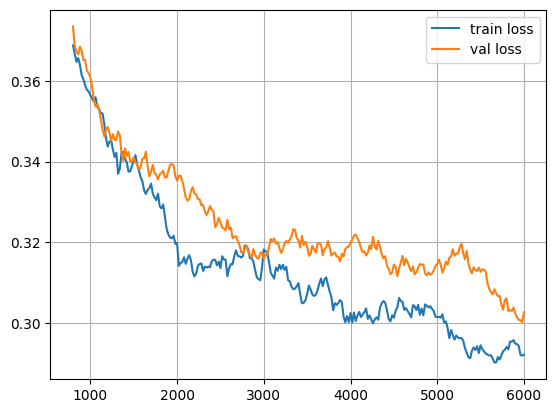

In [1]:
import ast
import json

import matplotlib.pyplot as plt
import numpy as np


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = './output/metrics.json'

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

train_loss = [float(v['loss_box_reg']) for v in metrics if 'loss_box_reg' in v.keys()]
val_loss = [float(v['val_loss_box_reg']) for v in metrics if 'val_loss_box_reg' in v.keys()]

N = 40

train_loss_avg = moving_average(train_loss, n=N)
val_loss_avg = moving_average(val_loss, n=N)

plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), train_loss_avg, label='train loss')
plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), val_loss_avg, label='val loss')
plt.legend()
plt.grid()
plt.show()